In [1]:
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt

from skimage.color import rgb2gray
from skimage.feature import canny

import cv2
from imutils.perspective import four_point_transform
from imutils import contours
import imutils

%matplotlib inline

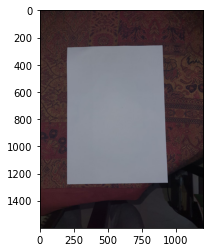

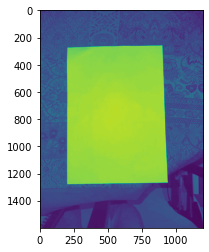

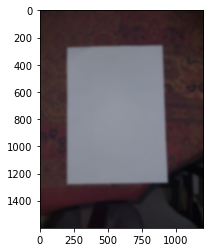

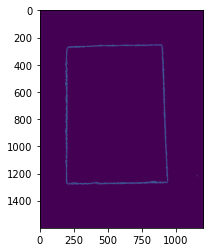

In [2]:
im = io.imread('paper.jpeg')
plt.figure()
plt.imshow(im)

gray = rgb2gray(im)
plt.figure()
plt.imshow(gray)

#edge_canny = canny(gray,sigma=4)
#plt.figure()
#plt.imshow(edge_canny)


blurred = cv2.GaussianBlur(im, (0, 0), 8)
blurred = np.uint8(blurred)
plt.figure()
plt.imshow(blurred)
canny_edge = cv2.Canny(blurred, 15, 25)

plt.figure()
plt.imshow(canny_edge)

cnts = cv2.findContours(canny_edge.copy(), cv2.RETR_EXTERNAL,
    cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
docCnt = None

# ensure that at least one contour was found
if len(cnts) > 0:
    # sort the contours according to their size in
    # descending order
    cnts = sorted(cnts, key=cv2.contourArea, reverse=True)
    # loop over the sorted contours
    for c in cnts:
        # approximate the contour
        peri = cv2.arcLength(c, True)
        approx = cv2.approxPolyDP(c, 0.02 * peri, True)
        # if our approximated contour has four points,
        # then we can assume we have found the paper
        if len(approx) == 4:
            docCnt = approx
            break

            

In [3]:
def perspective_correction(image):

    # load the image, convert it to grayscale, blur it
    # slightly, then find edges
    gray = rgb2gray(image)*256
    gray = np.uint8(gray)

    #blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    #edged = cv2.Canny(blurred, 75, 200)
    
    edged = np.uint8(canny(gray,sigma=4))
    

    # find contours in the edge map, then initialize
    # the contour that corresponds to the document
    cnts = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL,
        cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    docCnt = None
    # ensure that at least one contour was found
    if len(cnts) > 0:
        # sort the contours according to their size in
        # descending order
        cnts = sorted(cnts, key=cv2.contourArea, reverse=True)
        # loop over the sorted contours
        for c in cnts:
            # approximate the contour
            peri = cv2.arcLength(c, True)
            approx = cv2.approxPolyDP(c, 0.02 * peri, True)
            # if our approximated contour has four points,
            # then we can assume we have found the paper
            if len(approx) == 4:
                docCnt = approx
                break
                
    paper = four_point_transform(image, docCnt.reshape(4, 2))
    return paper

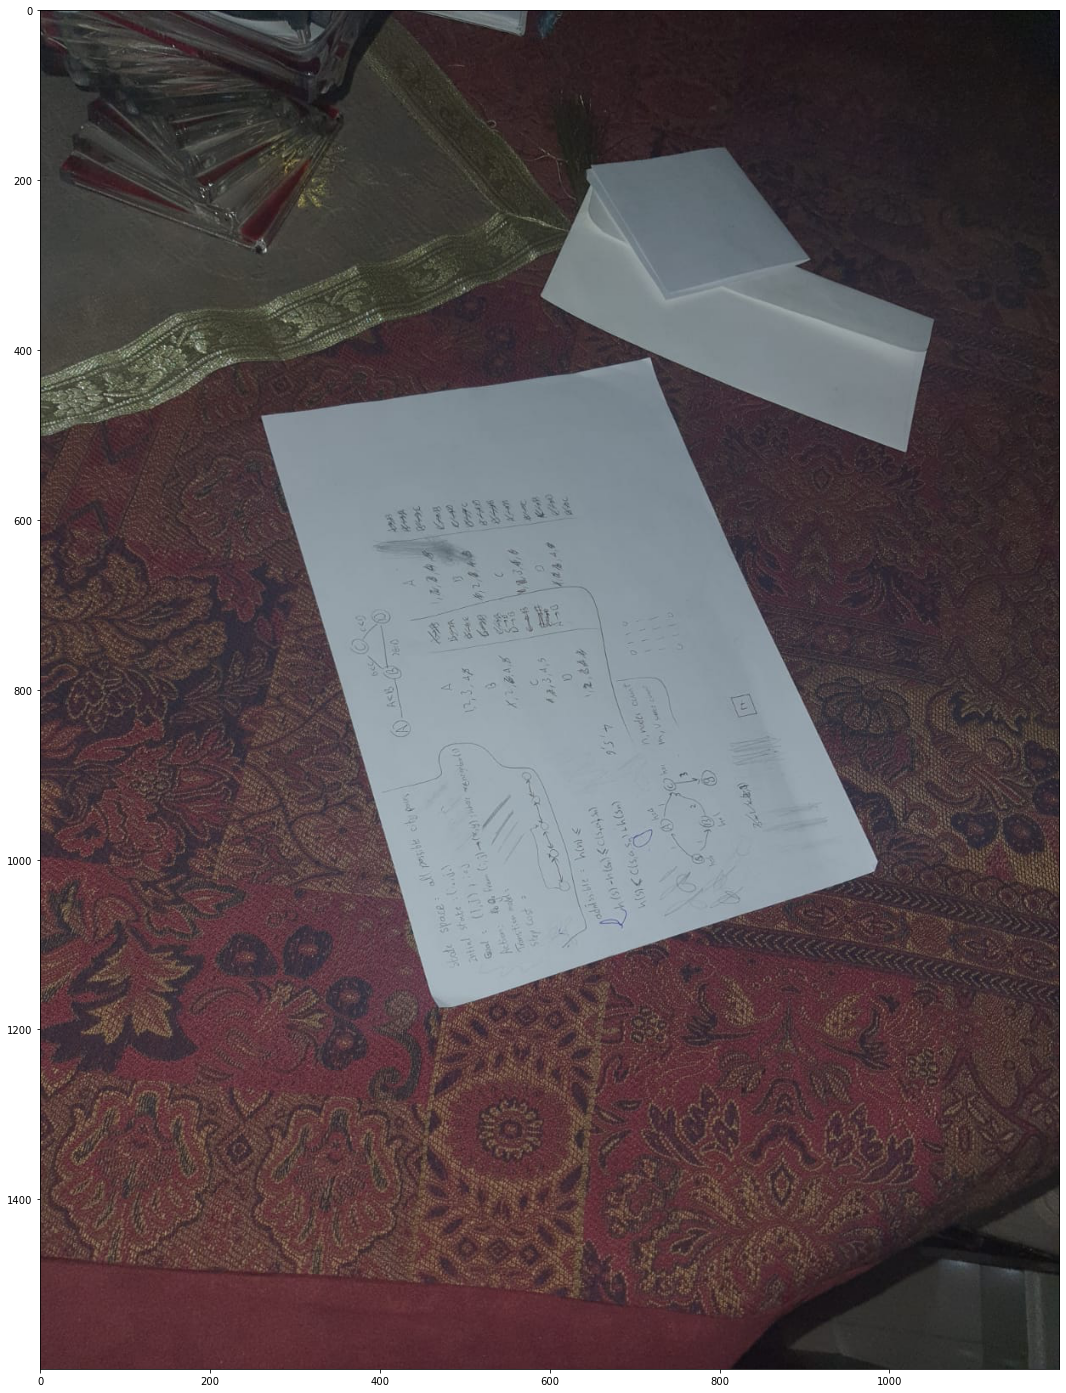

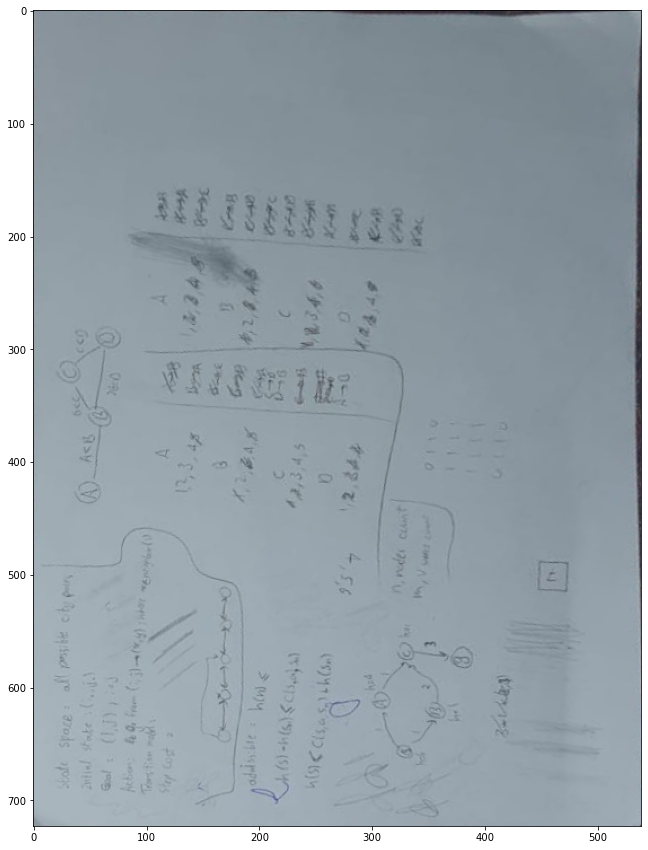

In [4]:
pap = io.imread('pp1.jpeg')

plt.figure(figsize=(25, 25))
plt.imshow(pap)

pap = perspective_correction(pap)
plt.figure(figsize=(15, 15))
plt.imshow(pap);